# Overview

I was inspired by stock performances due to the trade war between US and China (the most comprehensive scale). After the statement of US President Donald Trump, who slapped steep tariffs on billions of dollars' worth of Chinese goods, ranging from dishwashers to aircraft tyres and the strike-back of Chinese government, stock market immediately respond to these behavior. So, I decide to analyze some typical stocks and 
catch up with my opinion on whether investor should buy or sell these stocks. 

**Note: stock market is complicated and it's affected by many factors. This project only concerns data.**

This project is about stock market for four kinds of top companies **(Apple/Goole, Ford, Walmart, Bunge)** in each industry (IT,car,retail,agriculture), and some of them are hit objects of China. I will obtain stock information from IEX by pandas, visualize different aspects of stock by matplotlib/seaborn and analyze the daily return and the risk of stock based on its previous performance. What's more, I will predict future stock prices through the Monte Carlo Simulation.


## Main topics:
1. Stock Performance Analysis: Moving Averge; Bullish/Bearish

2. Daily Return Analysis: Correlation Coefficient

3. Risk Analysis: Value of Risk; Historical Method; Monte Carlo Simulation 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid') #white grid background
%matplotlib inline

In [2]:
pd.core.common.is_list_like = pd.api.types.is_list_like # Avoid ImportError: cannot import name 'is_list_like'. This error can be addressed when new Pandas releases
import pandas_datareader.data as web
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Obtain stock info of Apple, Google, Ford, Walmart, and Bunge from IEX 

In [3]:
stock_list = ['AAPL','GOOG','F','WMT','BG']
start = '2016-06-25'
end = '2018-06-25'
for stock in stock_list:   
    globals()[stock] = web.DataReader(stock,'iex',start,end)     # Set DataFrame as the Stock Ticker

# Output 5y is the problem due to the modification: pd.core.common.is_list_like = pd.api.types.is_list_like. 
# It donesn't influnce the dataset, just and additional print function that should be ignored.

5y
5y
5y
5y
5y


# General Stock Information Analysis: Apple

In [4]:
AAPL.describe() # Summary

,open,high,low,close,volume
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,143.899945,144.974581,142.894843,143.996537,3.038978e+07
std,27.959444,28.167799,27.668268,27.891977,1.323794e+07
min,89.759000,89.903900,88.406300,88.928100,1.147592e+07
25%,113.981650,114.620900,113.556650,114.059450,2.176331e+07
50%,149.180900,150.725100,147.605400,148.827700,2.678510e+07
75%,168.818000,170.241700,167.141350,168.251800,3.453816e+07
max,194.140000,194.200000,192.360000,193.980000,1.123403e+08


In [5]:
AAPL.info() # General Info

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 2016-06-27 to 2018-06-25
Data columns (total 5 columns):
open      503 non-null float64
high      503 non-null float64
low       503 non-null float64
close     503 non-null float64
volume    503 non-null int64
dtypes: float64(4), int64(1)
memory usage: 23.6+ KB


### Graph of stock closing prices:

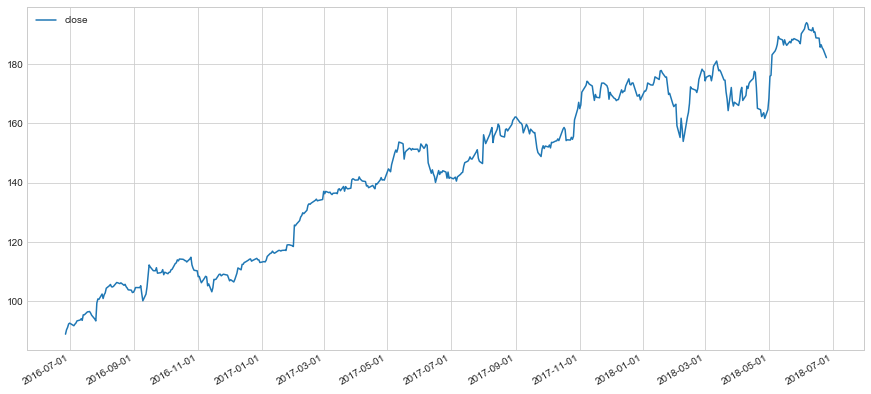

In [6]:
AAPL['date'] = AAPL.index
AAPL['date'] = pd.to_datetime(AAPL['date'])

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AAPL.date, AAPL.close) 
ax.legend()
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

### Graph of stock volumes:

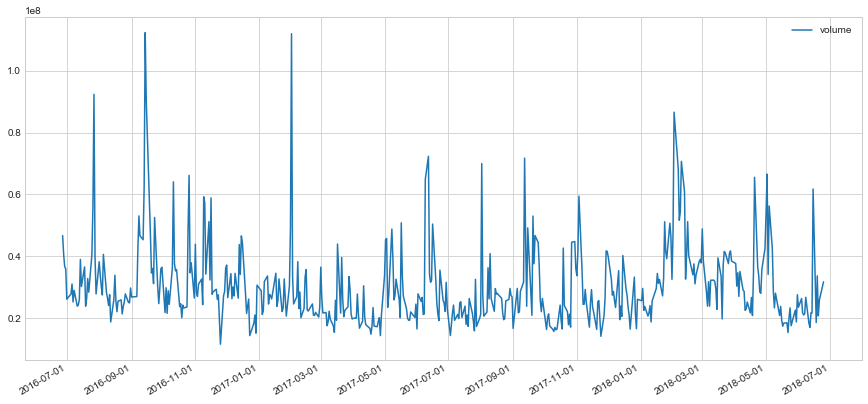

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AAPL.date, AAPL.volume) 
ax.legend()
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

I am goona caculate the 'Moving Average - MA' for the stock

## Moving Average (MA) 

MA is a widely used indicator in technical analysis that helps smooth out price action by filtering out the **noise** from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.


In [8]:
moving_avg_day = [10,50]
for ma in moving_avg_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['close'].rolling(ma).mean()

## Types of Moving Averages:

A moving average can be calculated in different ways. A five-day simple moving average (SMA) adds up the five most recent daily closing prices and divides it by five to create a new average each day. Each average is connected to the next, creating the singular flowing line.

Another popular type of moving average is the exponential moving average (EMA). The calculation is more complex, as it applies more weighting to the most recent prices. If you plot a 50-day SMA and a 50-day EMA on the same chart, you'll notice that the EMA reacts more quickly to price changes than the SMA does, due to the additional weighting on recent price data.

## Moving Average Length:

The time frame or length you choose for a moving average, also called the **look back period**, can play a big role in how effective it is. 

**An MA with a short time frame will react much quicker to price changes than an MA with a long look back period.**

### Graph of origin stock closing price comparing with those closing prices in cases of MA for 10/50 days by Simple Moving Average(SMA)

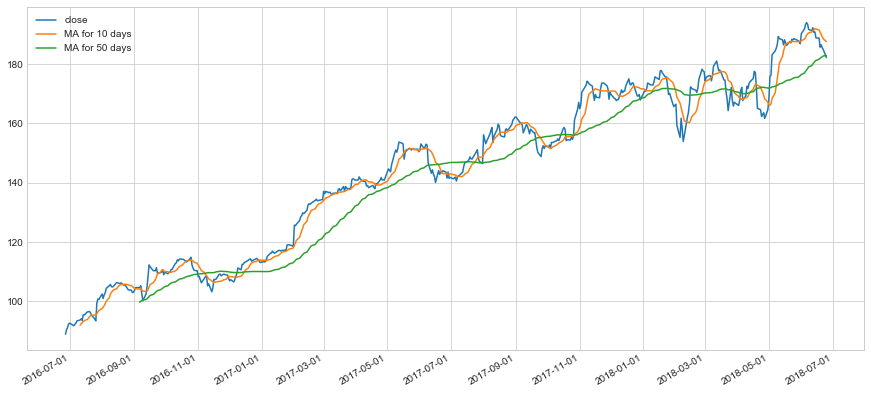

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AAPL.date, AAPL[['close','MA for 10 days','MA for 50 days']]) 
ax.legend(['close','MA for 10 days','MA for 50 days'])
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

We can see that there is a steep decrease after the US president Trump claimed to bring into force the tariffs to China in June,2018.

## Trading Strategies – Crossovers:

Crossovers are one of the main moving average strategies. The first type is a price crossover, which is when the price crosses above or below a moving average to signal a potential change in trend.

Another strategy is to apply two moving averages to a chart: one longer and one shorter. **When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross."**

**Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a "dead/death cross."**


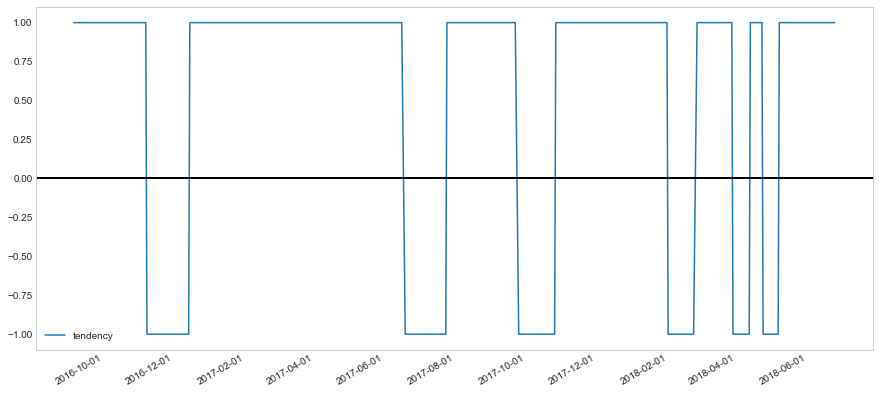

In [10]:
AAPL['10MA-50MA'] = AAPL['MA for 10 days'] - AAPL['MA for 50 days']
# 1 => bullish; -1 => bearish
AAPL['tendency'] = AAPL['10MA-50MA'].dropna().apply(lambda x: 1 if x >0 else -1)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AAPL.date, AAPL.tendency)
ax.axhline(y=0, color='black', lw=2)
ax.legend()
ax.grid(False)
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

In [11]:
AAPL['tendency'].value_counts()

 1.0    343
-1.0    111
Name: tendency, dtype: int64

Despite of the NaN, from 2016-08-01 to 2018-06-01, Apple stock is bullish in most of time with 76.43%.

## Disadvantages:

Moving averages are calculated based on historical data, and **nothing about the calculation is predictive in nature**. Therefore, results using moving averages can be **random**.

Moving averages work quite well in **strong trending conditions but poorly in choppy or ranging conditions**. Adjusting the time frame can remedy this problem temporarily, although at some point, these issues are likely to occur regardless of the time frame chosen for the moving average(s).

# Daily Return Analysis

In [12]:
AAPL['Daily Return'] = AAPL['close'].pct_change()

### Daily Return percentage graph:


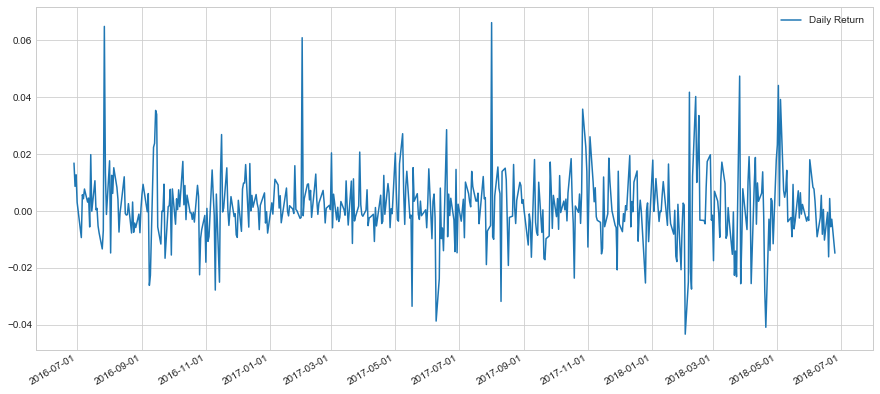

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AAPL.date, AAPL['Daily Return']) 
ax.legend()
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

### Daily Return distribution histgram and kernel denstity estimate plot:


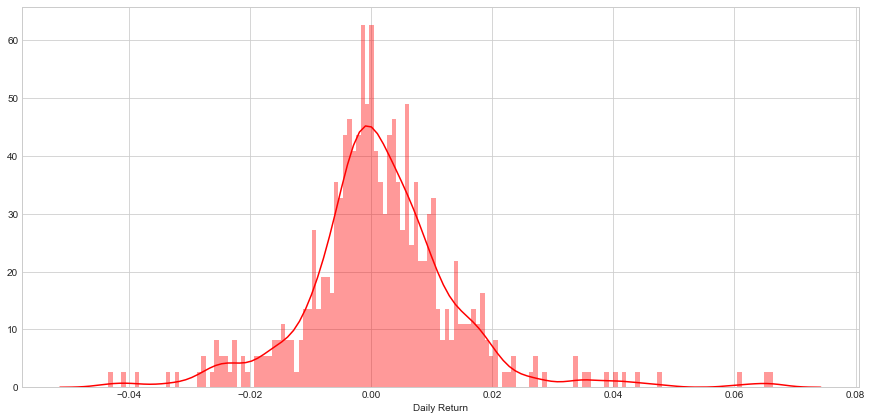

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(AAPL['Daily Return'].dropna(),bins=150,color = 'red')

In [15]:
# Create DataFrame for four companies' stock closing price
close = pd.DataFrame({'AAPL':AAPL['close'],'GOOG':GOOG['close'],'F':F['close'],'WMT':WMT['close'],'BG':BG['close']})

In [16]:
# Obtain daily return of each stocks
close_daily_return = close.pct_change()
close_daily_return.tail()

,AAPL,GOOG,F,WMT,BG
date,,,,,
2018-06-19,-0.016160,-0.004602,-0.008340,0.007349,0.010974
2018-06-20,0.004362,0.001524,-0.001682,0.000000,-0.022126
2018-06-21,-0.005576,-0.010412,-0.013479,0.007176,0.011100
2018-06-22,-0.002912,-0.001883,-0.005124,0.007244,0.006615
2018-06-25,-0.014871,-0.026543,-0.012876,0.019453,-0.003775


### Jointplot to company paired stock to check their correlation:


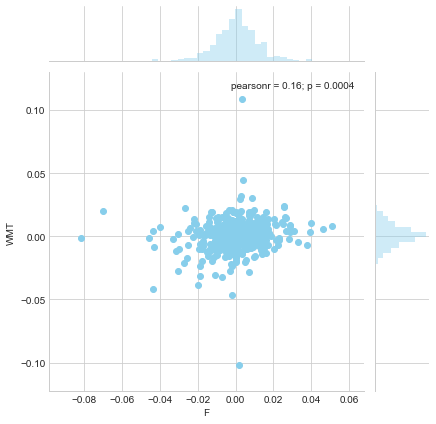

In [17]:
sns.jointplot(close_daily_return['F'],close_daily_return['WMT'],kind='scatter',color='skyblue')

## Pearson Correlation Coefficient 

pearsonr = 0.16 means the daily return of Ford and that of Walmart are not correlated.

### Pairplot for four stocks to analysis as a whole:

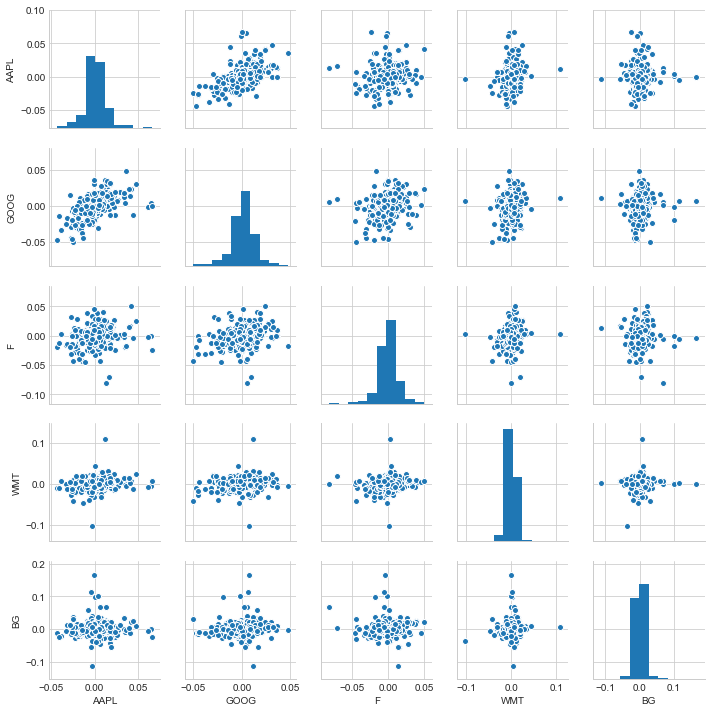

In [18]:
sns.pairplot(close_daily_return.dropna(),size=2)

It indicates that most pairs of stocks are not correlated, except Google and Apple.Since they both in IT industry, they have a postive correlation coefficient.


Make a pairplot more explainable by sns.PairGrid to control all parts of figures, such as diagonal, upper triangle, lower triangle.

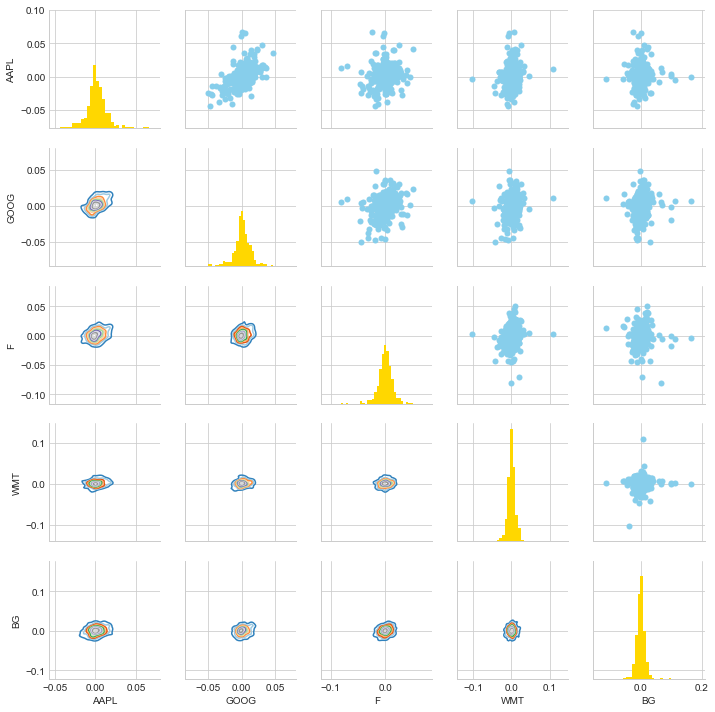

In [19]:
new_pairplot = sns.PairGrid(close_daily_return.dropna(),size=2)
# specify upper triangle data with scatter plots
new_pairplot.map_upper(plt.scatter,color='skyblue',linewidths=0.01)
# specify lower triangle data with kernel density estimate plots
new_pairplot.map_lower(sns.kdeplot,cmap='tab20c')
# specify diagonal data with histogram plots
new_pairplot.map_diag(plt.hist,bins=30,color='gold')

### Correlation matrix plot (heatmap) for the daily returns:

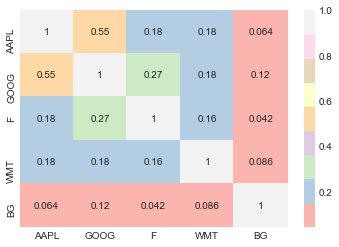

In [20]:
sns.heatmap(close_daily_return.corr(),annot=True,cmap='Pastel1')

Considering Daily Returns, Apple and Google has strongest positive correlation while other pairs' r are close to 0 just as the gap between different industries.

**Note: Pearson's r can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables. **

# Risk Analysis

### Base understanding: 
compare the expected return with standard deviation of the daily returns

In [21]:
new_rets = close_daily_return.dropna()

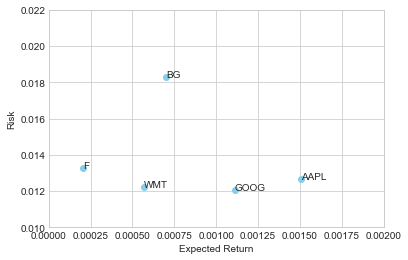

In [22]:
plt.scatter(new_rets.mean(), new_rets.std(),color='skyblue')
plt.xlim([0,0.002])
plt.ylim([0.01,0.022])
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for i,x,y in zip(new_rets.columns,new_rets.mean(),new_rets.std()):
    plt.annotate(i,(x,y))

Apple has most expected return and a lower risk, which is best choice for investor. IT companies always have the most profits comparing with other traditional industry.

Bunge is the worst performance stock with the highest risk but a lower expected return. Agriculture is easily affetect by natural factors resulting in a choppy condition. Seasonality is key for agriculture.

Other three stocks (Ford, Google and Walmart) are in a similar risk stage comparing with Apple, but have lower expected return.Traditional manufacture and retail are relativly stable industries.In addtion, I notice that Ford's Expected Return is close to 0 in the past two years and it is an affect by the expansion of Telsa and its product category. Brand-new sedans are struggling, even for Toyota's Camry. Ford's concerns low profit sedan series leads to the poor-performanced finicial report. Moreover, Ford confirms not to invest in a next generation of sedans for North America in late April,2018.

## Value of Risk

Value at risk (VaR) is a measure of the risk of loss for investments. **It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day.** VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible losses.

### The bottom line

Value at Risk (VAR) calculates the maximum loss expected (or worst case scenario) on an investment, over a given time period and given a specified degree of confidence. 

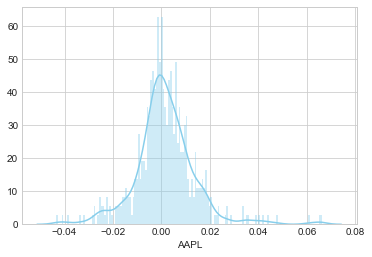

In [23]:
sns.distplot(new_rets['AAPL'].dropna(),bins=150,color='skyblue')

## Apply Historical Method

The historical method simply re-organizes actual historical returns, putting them **in order from worst to best**. It then assumes that history will repeat itself, from a risk perspective. It calculates a daily VAR.


In [24]:
new_rets['AAPL'].quantile(0.05)

-0.018044921184131268

For Apple, 0.05 empirical quantile of daily returns is at negative -0.01804, indicating that with 95% confidence, I expect that our worst daily loss will not exceed 1.804%.
If I invest 100, I am 95% confident that my worst daily loss will not exceed 1.804%.

## Apply Monte Carlo Simulation

The Monte Carlo Simulation involves developing a model for future stock price returns and running multiple hypothetical trials through the model. A Monte Carlo simulation refers to any method that randomly generates trials, but by itself does not tell us anything about the underlying methodology.It calculates monthly VAR.

Using the Monte Carlo to run many trials with random market conditions, then I'll calculate portfolio losses for each trial.

### 1. Specify a Model: Geometric Brownian motion

GBM is technically a **Markov process**, which means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the **efficient market hypothesis (EMH)** –  it is impossible to "beat the market" because stock market efficiency causes existing share prices to always incorporate and reflect all relevant information. 

**Note: stock case of appling EMH**: stocks always trade at their fair value on stock exchanges, making it impossible for investors to either purchase undervalued stocks or sell stocks for inflated prices.

**GBM equation:**

$$ \frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

    S: stock price
    μ：expected return
    σ：standard deviation of returns
    t: time horizon
    ϵ: random variable

$$\Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t})$$

In brackets, the first term called **drfit** and second term is **shock**. Drift is the average daily return multiplied by changed of time. Shock is the drift change for each peroid, and shock will casue a randomly push on stock price up or down.

### 2. Generate Random Trials

In [25]:
# Take Apple as an example
start_price = AAPL.iloc[-1:,0].values[0] # date:2018-06-25    close_price = 183.4
time_horizon = 365 
delta_t = 1/time_horizon # unit time horizon interval
mu = new_rets['AAPL'].mean() 
sigma = new_rets['AAPL'].std()

def monte_carlo_simulation(start_price, time_horizon, mu, sigma):
    price = np.zeros(time_horizon)
    price[0] = start_price
    drift = np.zeros(time_horizon)
    shock = np.zeros(time_horizon)
    for i in range(1,time_horizon):
        drift[i] = mu * delta_t
        shock[i] = np.random.normal(loc = mu * delta_t, scale = sigma * np.sqrt(delta_t))
        price[i] = price[i-1] +(price[i-1] * (drift[i] + shock[i]))
    return price

### 3. Visualize Simulated Output

Text(0.5,1,'Monte Carlo Simulation')

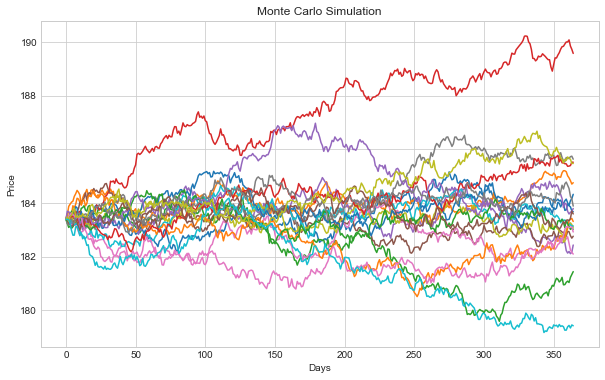

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(20):
    plt.plot(monte_carlo_simulation(start_price, time_horizon, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Simulation')

In [27]:
# Simulate 10000 times and get 10000 close_price at the last day of time_horizon
times = 10000
simulated = np.zeros(times)
for i in range(times):
    simulated[i] = monte_carlo_simulation(start_price, time_horizon, mu, sigma)[time_horizon-1]

To estimate VaR with 95% confidence, putting price **in order from worst to best** then I only need to locate the 500th outcome, and there are 500 worst outcome in the lowest 5%. **The 500th outcome is the maxmium price that investor can obtain per day in 95% confidence**.

<function matplotlib.pyplot.show(*args, **kw)>

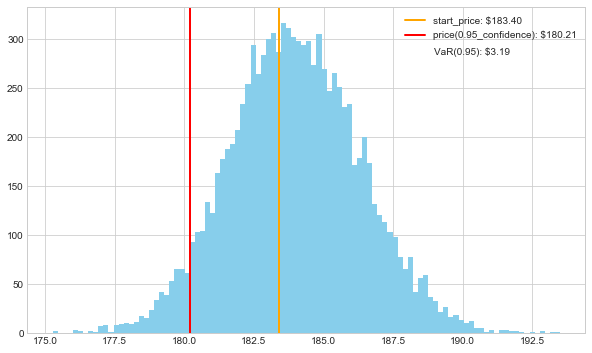

In [28]:
rank = 0.05 * times
simulated.sort()
firstFivePercent = simulated[int(rank)-1]

# Distribition of close_price after simulating for 365 days
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(simulated,bins=100,color='skyblue')
plt.axvline(x=start_price, linewidth=2, color='orange',label='start_price: $%.2f'%start_price)
plt.axvline(x=firstFivePercent, linewidth=2, color='r',label='price(0.95_confidence): $%.2f'%firstFivePercent)
plt.figtext(0.69, 0.77, "VaR(0.95): $%.2f" % (start_price - firstFivePercent,))
plt.legend()
plt.show

VaR(0.95_confidence) is losing $3.24 each day after simulating 10000 times for 365 days.

Trade wars, Trump tariffs and protectionism explained. (2018, June 15). Retrieved from https://www.bbc.com/news/world-43512098


Mitchell, C. (2018, May 18). How to Use a Moving Average to Buy Stocks. Retrieved from https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Riswick, J. (2018, April 25). Ford confirms the only cars it will sell are Mustang, Focus Active. Retrieved from https://www.autoblog.com/2018/04/25/ford-cancels-all-cars-mustang-focus-active/

Roth, D. (2018, April 29). Why Ford Will Probably Be Fine Without Sedans. Retrieved from https://www.forbes.com/sites/danroth/2018/04/29/why-ford-will-probably-be-fine-without-sedans/#25f2c3744507

Harper, D. (2018, February 06). An Introduction to Value at Risk (VAR). Retrieved from https://www.investopedia.com/articles/04/092904.asp

Harper, D. (2018, February 26). How to use Monte Carlo simulation with GBM. Retrieved from https://www.investopedia.com/articles/07/montecarlo.asp
